# Disease Prediction 2 datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler # importing StandardScaler

# using GridSearchCV to find the best parameters for the models

from sklearn.model_selection import GridSearchCV # importing GridSearchCV

# Importing chosen models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# importing the train_test_split function
from sklearn.model_selection import train_test_split

# importing the accuracy_score function
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score

# importing VotingClassifier
from sklearn.ensemble import VotingClassifier

In [2]:
# Importing datasets


df_0 = pd.read_csv("../Data/df_0_with_dummy_encoding.csv")
df_1 = pd.read_csv("../Data/df_1_with_dummy_encoding.csv")

df_0.drop("id", axis=1, inplace=True)
df_1.drop("id", axis=1, inplace=True)

In [3]:
df_0.head()

,age,cholesterol,gluc,smoke,alco,active,cardio,blood_pressure_category_Elevated,blood_pressure_category_Healthy,blood_pressure_category_Hypertensive Crisis,blood_pressure_category_Stage 1 Hypertension,blood_pressure_category_Stage 2 Hypertension,bmi_category_Normal,bmi_category_Obese Class 1,bmi_category_Obese Class 2,bmi_category_Obese Class 3,bmi_category_Overweight,bmi_category_Underweight,gender_1,gender_2
0,50,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1
1,55,3,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0
2,51,3,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0
3,48,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1
4,47,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [4]:
# Setting the models as objects

log_reg = LogisticRegression() # creating a LogisticRegression object
rf = RandomForestClassifier() # creating a RandomForestClassifier object
knn = KNeighborsClassifier() # creating a KNeighborsClassifier object
gauss_nb = GaussianNB()     # creating a GaussianNB object

In [5]:
# creating a function to split X and y of the dataset
def split_X_y(df, target):
    X = df.drop(target, axis=1)
    y = df[target]
    return X, y


def train_and_test(model, X_train, X_test, y_train, y_test): # defining the function
    model.fit(X_train, y_train) # training the model
    y_pred = model.predict(X_test) # predicting the test set

# function to print the accuracy score, confusion matrix and classification report and plotting the confusion matrix
def print_metrics(model, y_test, y_pred):
    print("Accuracy score: ", accuracy_score(y_test, y_pred)) # printing the accuracy score
    print("Confusion matrix: ", confusion_matrix(y_test, y_pred)) # printing the confusion matrix
    print("Classification report: ", classification_report(y_test, y_pred)) # printing the classification report
    print("F1-score: ", f1_score(y_test, y_pred)) # printing the f1-score
    print("Model: ", model) # printing the model
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=["No Cardiovascular Disease", "Cardiovascular Disease"]).plot() # plotting the confusion matrix
    plt.show() # showing the plot


# creating a function to find the best parameters for the models
def find_best_params(model, params, X_train, y_train): 
    grid_search = GridSearchCV(model, params, cv=5, n_jobs=-1, verbose=2) # creating a GridSearchCV object, params is the parameters to try, cv is the number of folds, n_jobs is the number of jobs to run in parallel, verbose is the verbosity level
    grid_search.fit(X_train, y_train) # fitting the model
    print("Model", model) #printing the model
    print("Best parameters: ", grid_search.best_params_) # printing the best parameters
    print("Best score: ", grid_search.best_score_) # printing the best score
    return grid_search.best_params_ # returning the best parameters

# creating a train and test split function that uses the best parameter
def train_and_test_with_best_params(model, X_train, X_test, y_train, y_test, best_params):
    model.set_params(**best_params) # setting the best parameters
    model.fit(X_train, y_train) # training the model
    y_pred = model.predict(X_test) # predicting the test set
    print_metrics(model, y_test, y_pred) # printing the metrics


## Importing functions from functions.py


In [6]:
X_0, y_0 = df_0.drop("cardio", axis=1), df_0["cardio"]

In [7]:
X_1, y_1 = df_1.drop("cardio", axis=1), df_1["cardio"]

In [8]:

X_0_train, X_0_test, y_0_train, y_0_test = train_test_split(X_0, y_0, test_size=0.33, random_state=42)

Training Model:  Logistic Regression For Dataset:  Dataset 0
TRAINED Model:  Logistic Regression For Dataset:  Dataset 0

Model:  Logistic Regression For Dataset:  Dataset 0
Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\Agam\.virtualenvs\Machine-Learning-Alexander-Andersson-sEvkd_-c\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Agam\.virtualenvs\Machine-Learning-Alexander-Andersson-sEvkd_-c\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Agam\.virtualenvs\Machine-Learning-Alexander-Andersson-sEvkd_-c\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.du

Model LogisticRegression()
Best parameters:  {'C': 0.1, 'penalty': 'l2'}
Best score:  0.7045830802588215


Training Model:  Logistic Regression For Dataset:  Dataset 0 With Best Parameters
Accuracy score:  0.7037413762603927
Confusion matrix:  [[8978 2404]
 [4295 6935]]
Classification report:                precision    recall  f1-score   support

           0       0.68      0.79      0.73     11382
           1       0.74      0.62      0.67     11230

    accuracy                           0.70     22612
   macro avg       0.71      0.70      0.70     22612
weighted avg       0.71      0.70      0.70     22612

F1-score:  0.6743157178277991
Model:  LogisticRegression(C=0.1)


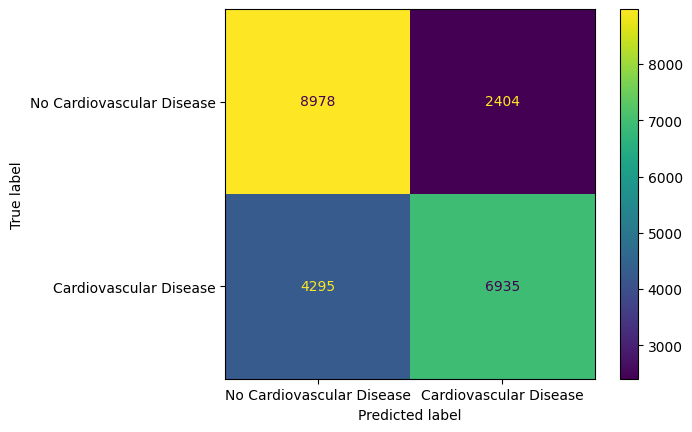

TRAINED Model:  Logistic Regression For Dataset:  Dataset 0 With Best Parameters



Best Model:  Logistic Regression For Dataset:  Dataset 0
Best Score:  0.7037413762603927
Best Parameters:  {'C': 0.1, 'penalty': 'l2'}
Best Confusion Matrix:  [[8978 2404]
 [4295 6935]]
Best Classification Report:                precision    recall  f1-score   support

           0       0.68      0.79      0.73     11382
           1       0.74      0.62      0.67     11230

    accuracy                           0.70     22612
   macro avg       0.71      0.70      0.70     22612
weighted avg       0.71      0.70      0.70     22612



Training Model:  Random Forest For Dataset:  Dataset 0
TRAINED Model:  Random Forest For Dataset:  Dataset 0

Model:  Random Forest For Dataset:  Dataset 0
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Model RandomForestClassifier()
Best parameters:  {'max_depth': 10, 'n_estimators': 100}
Best score:  0.7049751825452027


Training Model:  Random Forest F

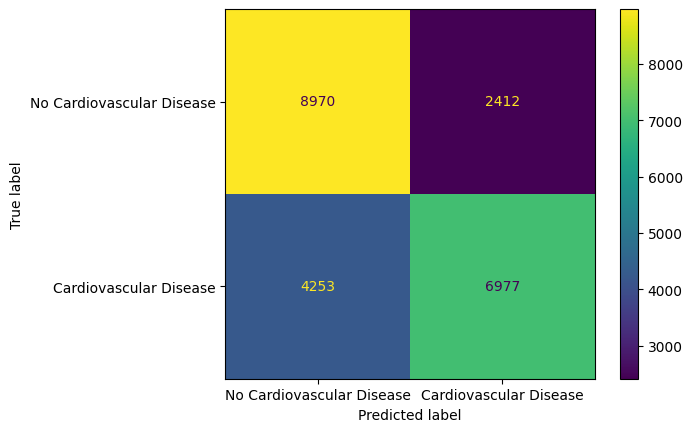

TRAINED Model:  Random Forest For Dataset:  Dataset 0 With Best Parameters



Best Model:  Random Forest For Dataset:  Dataset 0
Best Score:  0.7052450026534584
Best Parameters:  {'max_depth': 10, 'n_estimators': 100}
Best Confusion Matrix:  [[8970 2412]
 [4253 6977]]
Best Classification Report:                precision    recall  f1-score   support

           0       0.68      0.79      0.73     11382
           1       0.74      0.62      0.68     11230

    accuracy                           0.71     22612
   macro avg       0.71      0.70      0.70     22612
weighted avg       0.71      0.71      0.70     22612



Training Model:  KNN For Dataset:  Dataset 0
TRAINED Model:  KNN For Dataset:  Dataset 0

Model:  KNN For Dataset:  Dataset 0
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model KNeighborsClassifier()
Best parameters:  {'n_neighbors': 11, 'weights': 'uniform'}
Best score:  0.6798380501851353


Training Model:  KNN For Dataset:  Dataset 0 With Best Paramete

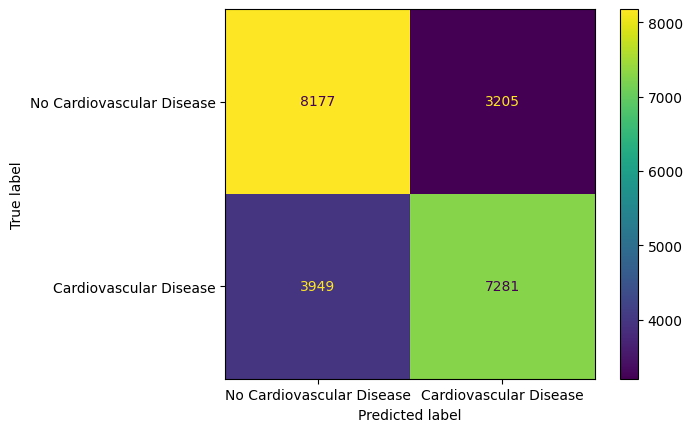

TRAINED Model:  KNN For Dataset:  Dataset 0 With Best Parameters



Best Model:  KNN For Dataset:  Dataset 0
Best Score:  0.6836193171767203
Best Parameters:  {'n_neighbors': 11, 'weights': 'uniform'}
Best Confusion Matrix:  [[8177 3205]
 [3949 7281]]
Best Classification Report:                precision    recall  f1-score   support

           0       0.67      0.72      0.70     11382
           1       0.69      0.65      0.67     11230

    accuracy                           0.68     22612
   macro avg       0.68      0.68      0.68     22612
weighted avg       0.68      0.68      0.68     22612



Training Model:  Gaussian Naive Bayes For Dataset:  Dataset 0
TRAINED Model:  Gaussian Naive Bayes For Dataset:  Dataset 0

Model:  Gaussian Naive Bayes For Dataset:  Dataset 0
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Model GaussianNB()
Best parameters:  {'var_smoothing': 1e-09}
Best score:  0.6890082225679349


Training Model:  Gaussian Naive Bayes For Dataset:  Datas

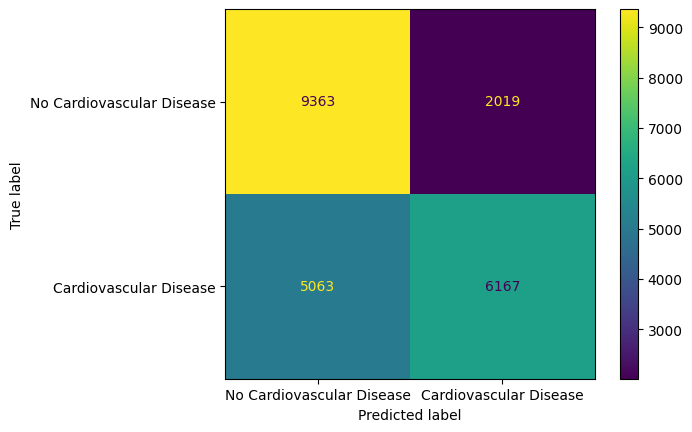

TRAINED Model:  Gaussian Naive Bayes For Dataset:  Dataset 0 With Best Parameters



Best Model:  Gaussian Naive Bayes For Dataset:  Dataset 0
Best Score:  0.6868034671855652
Best Parameters:  {'var_smoothing': 1e-09}
Best Confusion Matrix:  [[9363 2019]
 [5063 6167]]
Best Classification Report:                precision    recall  f1-score   support

           0       0.65      0.82      0.73     11382
           1       0.75      0.55      0.64     11230

    accuracy                           0.69     22612
   macro avg       0.70      0.69      0.68     22612
weighted avg       0.70      0.69      0.68     22612



Training Model:  Logistic Regression For Dataset:  Dataset 1
TRAINED Model:  Logistic Regression For Dataset:  Dataset 1

Model:  Logistic Regression For Dataset:  Dataset 1
Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\Agam\.virtualenvs\Machine-Learning-Alexander-Andersson-sEvkd_-c\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Agam\.virtualenvs\Machine-Learning-Alexander-Andersson-sEvkd_-c\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Agam\.virtualenvs\Machine-Learning-Alexander-Andersson-sEvkd_-c\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.du

Model LogisticRegression(C=0.1)
Best parameters:  {'C': 0.1, 'penalty': 'l2'}
Best score:  0.7045830802588215


Training Model:  Logistic Regression For Dataset:  Dataset 1 With Best Parameters
Accuracy score:  0.7253670617371307
Confusion matrix:  [[8963 2419]
 [3791 7439]]
Classification report:                precision    recall  f1-score   support

           0       0.70      0.79      0.74     11382
           1       0.75      0.66      0.71     11230

    accuracy                           0.73     22612
   macro avg       0.73      0.72      0.72     22612
weighted avg       0.73      0.73      0.72     22612

F1-score:  0.7055197268588771
Model:  LogisticRegression(C=0.1)


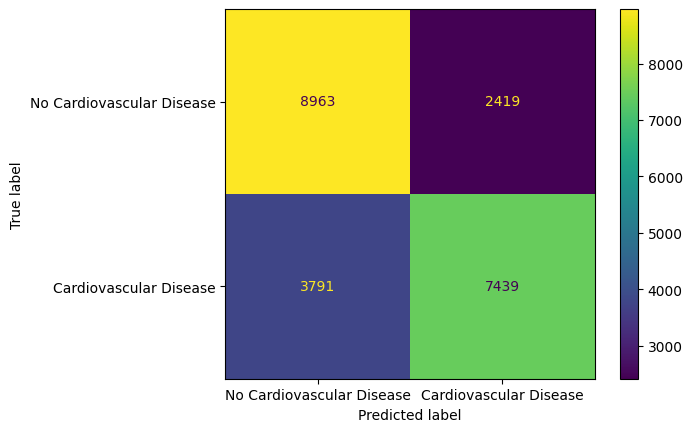

TRAINED Model:  Logistic Regression For Dataset:  Dataset 1 With Best Parameters



Best Model:  Logistic Regression For Dataset:  Dataset 1
Best Score:  0.7253670617371307
Best Parameters:  {'C': 0.1, 'penalty': 'l2'}
Best Confusion Matrix:  [[8963 2419]
 [3791 7439]]
Best Classification Report:                precision    recall  f1-score   support

           0       0.70      0.79      0.74     11382
           1       0.75      0.66      0.71     11230

    accuracy                           0.73     22612
   macro avg       0.73      0.72      0.72     22612
weighted avg       0.73      0.73      0.72     22612



Training Model:  Random Forest For Dataset:  Dataset 1
TRAINED Model:  Random Forest For Dataset:  Dataset 1

Model:  Random Forest For Dataset:  Dataset 1
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Model RandomForestClassifier(max_depth=10)
Best parameters:  {'max_depth': 10, 'n_estimators': 200}
Best score:  0.7048880887723505


Training Model:  Ran

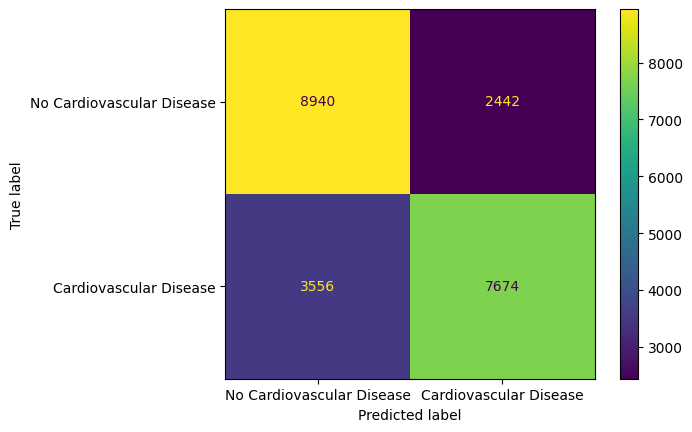

TRAINED Model:  Random Forest For Dataset:  Dataset 1 With Best Parameters



Best Model:  Random Forest For Dataset:  Dataset 1
Best Score:  0.7347426145409517
Best Parameters:  {'max_depth': 10, 'n_estimators': 100}
Best Confusion Matrix:  [[8940 2442]
 [3556 7674]]
Best Classification Report:                precision    recall  f1-score   support

           0       0.72      0.79      0.75     11382
           1       0.76      0.68      0.72     11230

    accuracy                           0.73     22612
   macro avg       0.74      0.73      0.73     22612
weighted avg       0.74      0.73      0.73     22612



Training Model:  KNN For Dataset:  Dataset 1
TRAINED Model:  KNN For Dataset:  Dataset 1

Model:  KNN For Dataset:  Dataset 1
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model KNeighborsClassifier(n_neighbors=11)
Best parameters:  {'n_neighbors': 11, 'weights': 'uniform'}
Best score:  0.6798380501851353


Training Model:  KNN For Dataset:  Dataset 1 With

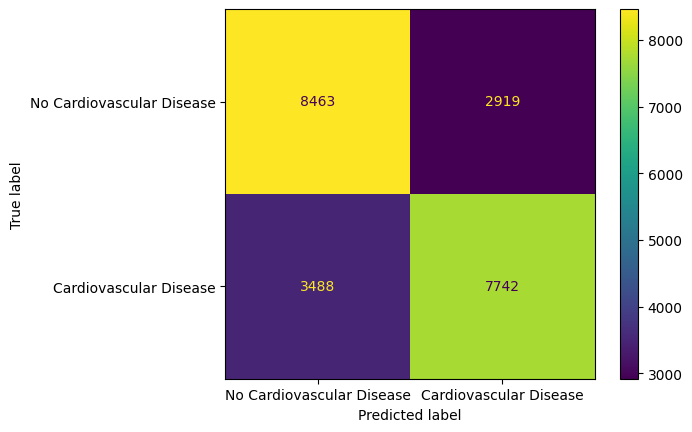

TRAINED Model:  KNN For Dataset:  Dataset 1 With Best Parameters



Best Model:  KNN For Dataset:  Dataset 1
Best Score:  0.7166548735184858
Best Parameters:  {'n_neighbors': 11, 'weights': 'uniform'}
Best Confusion Matrix:  [[8463 2919]
 [3488 7742]]
Best Classification Report:                precision    recall  f1-score   support

           0       0.71      0.74      0.73     11382
           1       0.73      0.69      0.71     11230

    accuracy                           0.72     22612
   macro avg       0.72      0.72      0.72     22612
weighted avg       0.72      0.72      0.72     22612



Training Model:  Gaussian Naive Bayes For Dataset:  Dataset 1
TRAINED Model:  Gaussian Naive Bayes For Dataset:  Dataset 1

Model:  Gaussian Naive Bayes For Dataset:  Dataset 1
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Model GaussianNB()
Best parameters:  {'var_smoothing': 1e-09}
Best score:  0.6890082225679349


Training Model:  Gaussian Naive Bayes For Dataset:  Datas

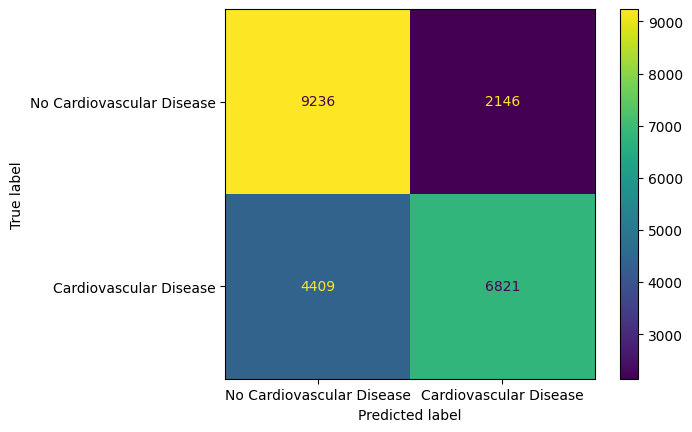

TRAINED Model:  Gaussian Naive Bayes For Dataset:  Dataset 1 With Best Parameters



Best Model:  Gaussian Naive Bayes For Dataset:  Dataset 1
Best Score:  0.7101096762780824
Best Parameters:  {'var_smoothing': 1e-09}
Best Confusion Matrix:  [[9236 2146]
 [4409 6821]]
Best Classification Report:                precision    recall  f1-score   support

           0       0.68      0.81      0.74     11382
           1       0.76      0.61      0.68     11230

    accuracy                           0.71     22612
   macro avg       0.72      0.71      0.71     22612
weighted avg       0.72      0.71      0.71     22612



                  Model     Score                                 Parameters  \
0   Logistic Regression  0.703741                {'C': 0.1, 'penalty': 'l2'}   
1         Random Forest  0.705245     {'max_depth': 10, 'n_estimators': 100}   
2                   KNN  0.683619  {'n_neighbors': 11, 'weights': 'uniform'}   
3  Gaussian Naive Bayes  0.686803                   {

In [9]:



X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.33, random_state=42)

# Scaling the data
scaler = StandardScaler() # creating a StandardScaler object
X_0_train_scaled = scaler.fit_transform(X_0_train) # scaling the training set
X_0_test_scaled = scaler.transform(X_0_test) # scaling the test set

X_1_train_scaled = scaler.fit_transform(X_1_train) # scaling the training set
X_1_test_scaled = scaler.transform(X_1_test) # scaling the test set

# Creating a list of models
models = [log_reg, rf, knn, gauss_nb]

# Creating a list of model names
model_names = ["Logistic Regression", "Random Forest", "KNN", "Gaussian Naive Bayes"]

# Creating a list of scaled datasets

scaled_datasets = [(X_0_train_scaled, X_0_test_scaled, y_0_train, y_0_test), (X_1_train_scaled, X_1_test_scaled, y_1_train, y_1_test)]

# Creating a list of dataset names
dataset_names = ["Dataset 0", "Dataset 1"]

# Creating a list of parameters to try
params = [{"C": [0.1, 1, 10, 100, 1000], "penalty": ["l1", "l2"]}, # parameters for LogisticRegression
            {"n_estimators": [100, 200, 300, 400, 500], "max_depth": [5, 10, 15, 20, 25]}, # parameters for RandomForestClassifier
            {"n_neighbors": [3, 5, 7, 9, 11], "weights": ["uniform", "distance"]}, # parameters for KNeighborsClassifier
            {"var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}] # parameters for GaussianNB

# Creating a list of parameter names
param_names = ["Logistic Regression", "Random Forest", "KNN", "Gaussian Naive Bayes"]

# Creating a list of best parameters
best_params = []

# Creating a list of best scores
best_scores = []

# Creating a list of best models
best_models = []

# Creating a list of best model names
best_model_names = []

# Creating a list of best model scores
best_model_scores = []

# Creating a list of best model predictions
best_model_preds = []

# Creating a list of best model confusion matrices
best_model_confusion_matrices = []

# Creating a list of best model classification reports
best_model_classification_reports = []

# Running the models on the datasets
for i in range(len(scaled_datasets)): # runs 2 times
    for j in range(len(models)): # runs 4 times
        print("Training Model: ", model_names[j], "For Dataset: ", dataset_names[i])
        train_and_test(models[j], scaled_datasets[i][0], scaled_datasets[i][1], scaled_datasets[i][2], scaled_datasets[i][3])
        print("TRAINED Model: ", model_names[j], "For Dataset: ", dataset_names[i])
        print("")

        # Finding the best parameters for the models
        print("Model: ", param_names[j], "For Dataset: ", dataset_names[i])
        best_params.append(find_best_params(models[j], params[j], scaled_datasets[0][0], scaled_datasets[0][2]))
        print("")
        print("")


        # Training the models with the best parameters
        print("Training Model: ", model_names[j], "For Dataset: ", dataset_names[i], "With Best Parameters")

        train_and_test_with_best_params(models[j], scaled_datasets[i][0], scaled_datasets[i][1], scaled_datasets[i][2], scaled_datasets[i][3], best_params[j])

        print("TRAINED Model: ", model_names[j], "For Dataset: ", dataset_names[i], "With Best Parameters")
        print("")

        # Saving the best models
        best_models.append(models[j])
        best_model_names.append(model_names[j])
        best_model_scores.append(models[j].score(scaled_datasets[i][1], scaled_datasets[i][3]))
        best_model_preds.append(models[j].predict(scaled_datasets[i][1]))
        best_model_confusion_matrices.append(confusion_matrix(scaled_datasets[i][3], models[j].predict(scaled_datasets[i][1])))
        best_model_classification_reports.append(classification_report(scaled_datasets[i][3], models[j].predict(scaled_datasets[i][1])))
        print("")
        print("")


        # Printing the best models
        print("Best Model: ", model_names[j], "For Dataset: ", dataset_names[i])
        print("Best Score: ", models[j].score(scaled_datasets[i][1], scaled_datasets[i][3]))
        print("Best Parameters: ", best_params[j])
        print("Best Confusion Matrix: ", confusion_matrix(scaled_datasets[i][3], models[j].predict(scaled_datasets[i][1])))
        print("Best Classification Report: ", classification_report(scaled_datasets[i][3], models[j].predict(scaled_datasets[i][1])))
        print("")
        print("")

        



# Creating a dataframe of the best models
best_models_df = pd.DataFrame({"Model": best_model_names, "Score": best_model_scores, "Parameters": best_params, "Predictions": best_model_preds, "Confusion Matrix": best_model_confusion_matrices, "Classification Report": best_model_classification_reports})

# Printing the dataframe
print(best_models_df)

# Saving the dataframe to a csv file





C:\Users\Agam\AppData\Local\Temp\ipykernel_2456\1445294302.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


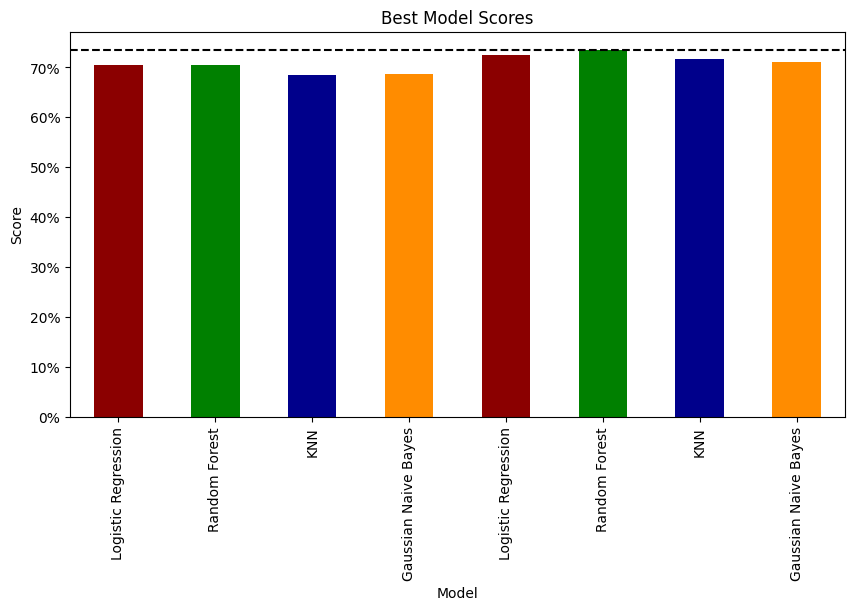

In [10]:
fig = best_models_df["Score"].plot(kind="bar", title="Best Model Scores", figsize=(10, 5), color=["darkred", "green", "darkblue", "darkorange"])
fig.set_xlabel("Model")
fig.set_ylabel("Score")
fig.set_xticklabels(best_models_df["Model"])
# setting y label as percentage
vals = fig.get_yticks()
fig.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

# getting horizontal line
hline = fig.axhline(y=0.735, color="black", linestyle="--")

plt.show()

## Dataset 2 seems to give me a slight increase in score.


2.5 Ensemble
Använd VotingClassifier() på datasetet som du valt och lägg in de bästa parametrarna för respektive
modell.

[0 1 0 ... 1 0 1]
Ensemble Model
Ensemble Model Score:  0.729037679108438
Ensemble Model Confusion Matrix:  [[9321 2061]
 [4066 7164]]
Ensemble Model Classification Report:                precision    recall  f1-score   support

           0       0.70      0.82      0.75     11382
           1       0.78      0.64      0.70     11230

    accuracy                           0.73     22612
   macro avg       0.74      0.73      0.73     22612
weighted avg       0.74      0.73      0.73     22612



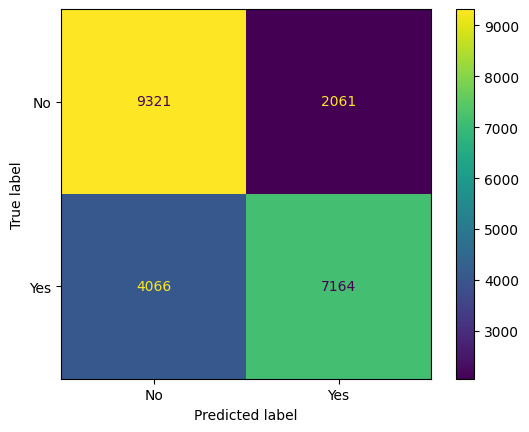

In [11]:
# Using the models with the best parameters with VotingClassifier() to create an ensemble model
voting_clf = VotingClassifier(estimators=[("lr", log_reg), ("rf", rf), ("knn", knn), ("gnb", gauss_nb)], voting="hard")
voting_clf.fit(X_1_train_scaled, y_1_train)
voting_clf.score(X_1_test_scaled, y_1_test)

# Creating a list of the ensemble model predictions
voting_clf_preds = voting_clf.predict(X_1_test_scaled)
print(voting_clf_preds)

# Creating a list of the ensemble model confusion matrices
voting_clf_confusion_matrices = confusion_matrix(y_1_test, voting_clf_preds)

# Creating a list of the ensemble model classification reports
voting_clf_classification_reports = classification_report(y_1_test, voting_clf_preds)

# Printing the ensemble model
print("Ensemble Model")
print("Ensemble Model Score: ", voting_clf.score(X_1_test_scaled, y_1_test))
print("Ensemble Model Confusion Matrix: ", confusion_matrix(y_1_test, voting_clf_preds))
print("Ensemble Model Classification Report: ", classification_report(y_1_test, voting_clf_preds))

# plotting with ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=voting_clf_confusion_matrices, display_labels=["No", "Yes"])
disp.plot()



## Voting Classifier is as good as The Random Forest model on dataset 1

In [12]:
# Saving 100 random and 100 non-random samples to a csv file
display(df_1.info())
df_1.sample(100).to_csv("test_samples.csv")
# removing the random samples from the dataframe using the index
df_1 = df_1.drop(df_1.sample(100).index)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68520 entries, 0 to 68519
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68520 non-null  int64  
 1   ap_hi        68520 non-null  int64  
 2   ap_lo        68520 non-null  int64  
 3   cholesterol  68520 non-null  int64  
 4   gluc         68520 non-null  int64  
 5   smoke        68520 non-null  int64  
 6   alco         68520 non-null  int64  
 7   active       68520 non-null  int64  
 8   cardio       68520 non-null  int64  
 9   bmi          68520 non-null  float64
 10  gender_1     68520 non-null  int64  
 11  gender_2     68520 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.3 MB


None

In [13]:

display(df_1)

,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,gender_1,gender_2
0,50,110,80,1,1,0,0,1,0,21.97,0,1
1,55,140,90,3,1,0,0,1,1,34.93,1,0
2,51,130,70,3,1,0,0,0,1,23.51,1,0
3,48,150,100,1,1,0,0,1,1,28.71,0,1
4,47,100,60,1,1,0,0,0,0,23.01,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68515,57,150,80,1,1,0,0,1,1,29.38,1,0
68516,52,120,80,1,1,1,0,1,0,26.93,0,1
68517,52,180,90,3,1,0,1,0,1,31.35,0,1
68518,61,135,80,1,2,0,0,0,1,27.10,1,0


In [14]:
# creating df with only the random samples
df_test = pd.read_csv("../Data/test_samples.csv")
df_test.drop(columns=["Unnamed: 0"], inplace=True)

In [15]:
# Check if any rows in df_test are present in df_1
duplicates = df_1.duplicated(df_test)

# Subset df_test to show the duplicate rows
df_test_duplicates = df_test[duplicates]

# Print the duplicate rows
print(df_test_duplicates)

# Print the number of duplicate rows
print("Number of duplicate rows: ", len(df_test_duplicates))


Empty DataFrame
Columns: [age, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio, bmi, gender_1, gender_2]
Index: []
Number of duplicate rows:  0


C:\Users\Agam\AppData\Local\Temp\ipykernel_2456\3544196096.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_duplicates = df_test[duplicates]


## The sample data is no longer in df_1. Good. I can now be sure that there will be no data leakage.

In [18]:
# importing joblib to save the model
import joblib as job

# Deploying model with joblib.dump()
job.dump(voting_clf, "voting_clf.joblib")



['voting_clf.joblib']

In [19]:
# Loading the model with joblib.load()

# Loading the model
voting_clf = job.load("voting_clf.joblib")
